In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
salary = pd.read_csv('C:\\Users\\admin\\Desktop\\DATA SCIENCE\\assignments\\Naive bayes\\SalaryData_Train.csv')

In [3]:
salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
salary.shape

(30161, 14)

In [5]:
salary.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [6]:
salary.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
salary.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
# no null values

In [9]:
salary.duplicated().value_counts()

False    26903
True      3258
dtype: int64

In [10]:
salary.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [11]:
salary['workclass'].value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [12]:
salary['education'].value_counts()

 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

In [13]:
salary['maritalstatus'].value_counts()

 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

In [14]:
salary['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [15]:
salary['relationship'].value_counts()

 Husband           12463
 Not-in-family      7726
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      888
Name: relationship, dtype: int64

In [16]:
salary['race'].value_counts()

 White                 25932
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other                   231
Name: race, dtype: int64

In [17]:
salary['native'].value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 Italy                            68
 China                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Taiwan                           42
 Haiti                            42
 Iran                             42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [18]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [19]:
salary['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [20]:
salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()

In [23]:
salary['Salary'] = le.fit_transform(salary['Salary'])

In [24]:
salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


# Data visualization

<AxesSubplot:xlabel='workclass', ylabel='count'>

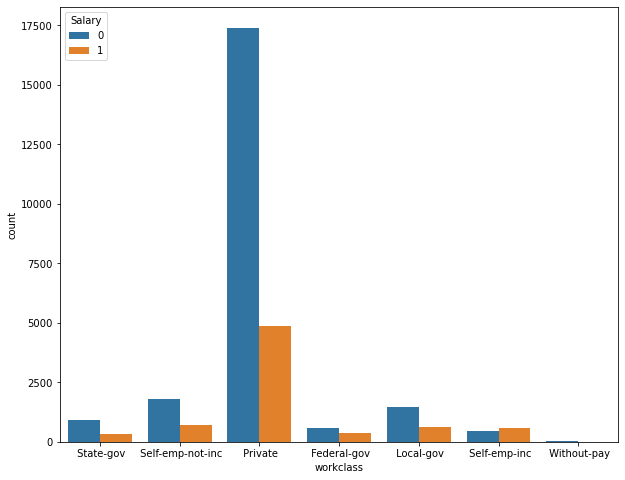

In [25]:
plt.figure(figsize = (10,8))
sns.countplot(x="workclass", hue="Salary", data=salary)

<AxesSubplot:xlabel='education', ylabel='count'>

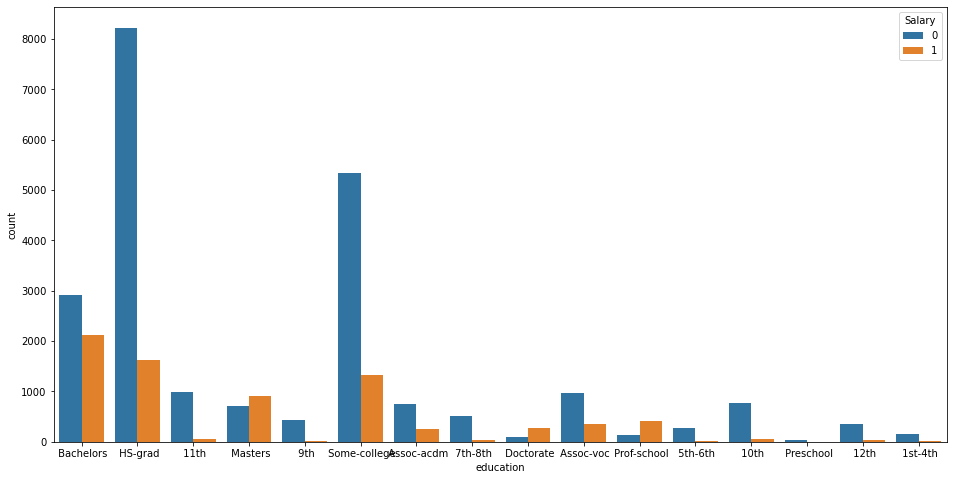

In [26]:
plt.figure(figsize = (16,8))
sns.countplot(x="education", hue="Salary", data=salary)

<AxesSubplot:xlabel='maritalstatus', ylabel='count'>

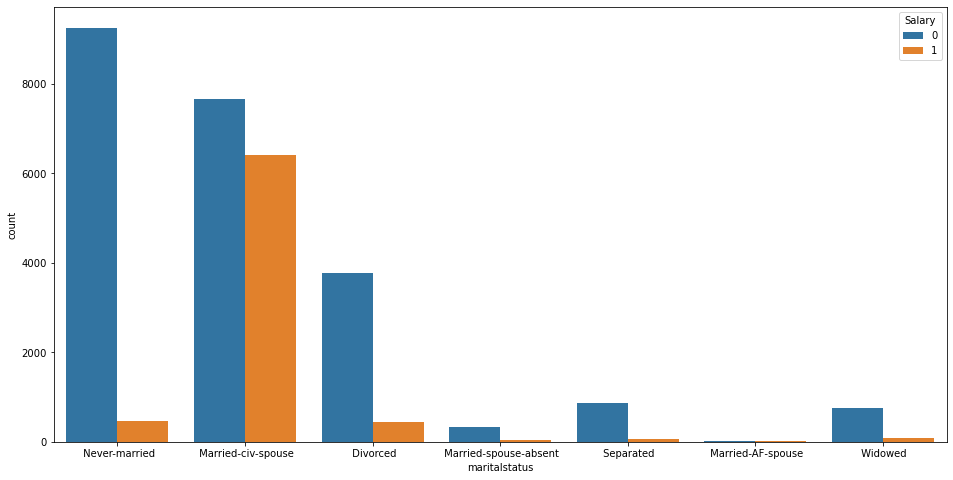

In [27]:
plt.figure(figsize = (16,8))
sns.countplot(x="maritalstatus", hue="Salary", data=salary)

<AxesSubplot:xlabel='occupation', ylabel='count'>

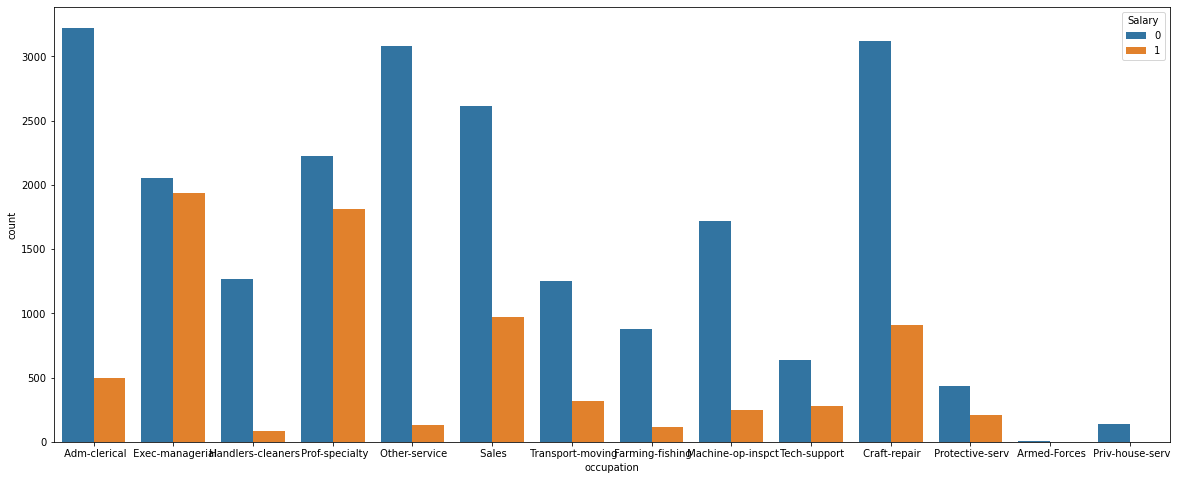

In [28]:
plt.figure(figsize = (20,8))
sns.countplot(x="occupation", hue="Salary", data=salary)

<AxesSubplot:xlabel='relationship', ylabel='count'>

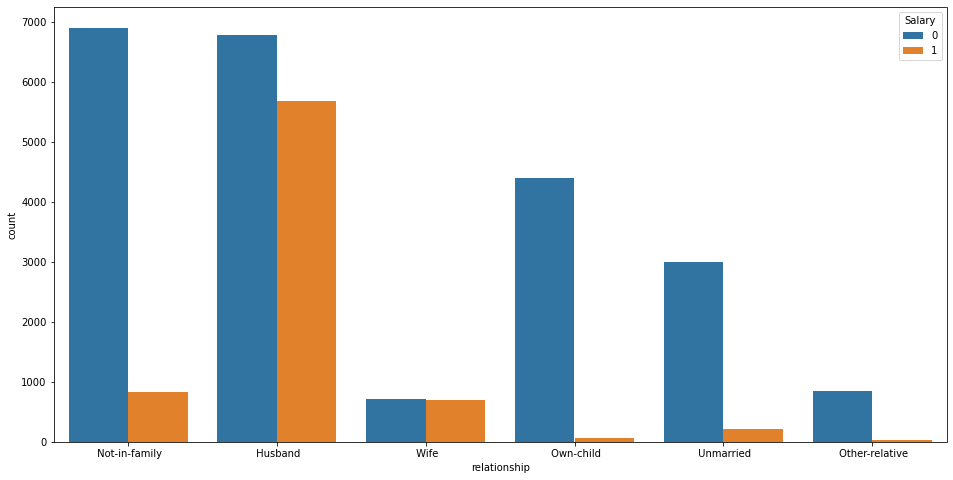

In [29]:
plt.figure(figsize = (16,8))
sns.countplot(x="relationship", hue="Salary", data=salary)

<AxesSubplot:xlabel='race', ylabel='count'>

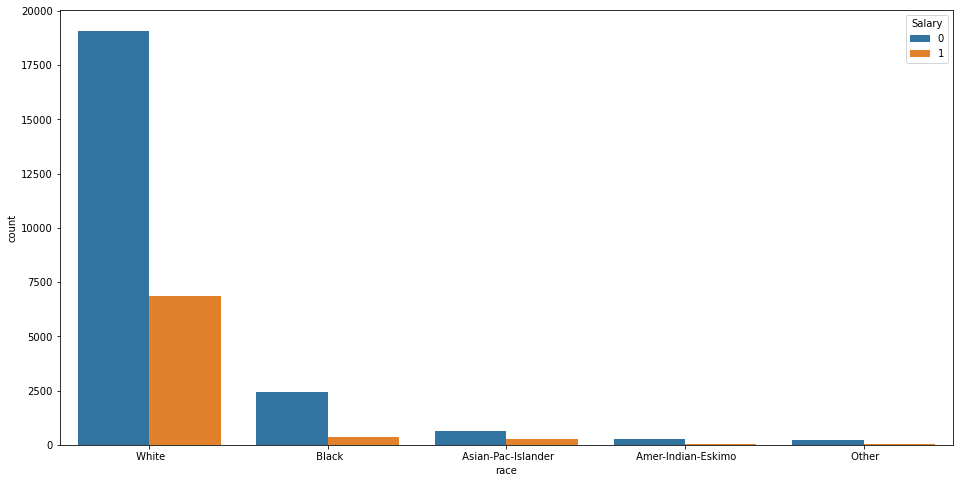

In [30]:
plt.figure(figsize = (16,8))
sns.countplot(x="race", hue="Salary", data=salary)

<AxesSubplot:xlabel='native', ylabel='count'>

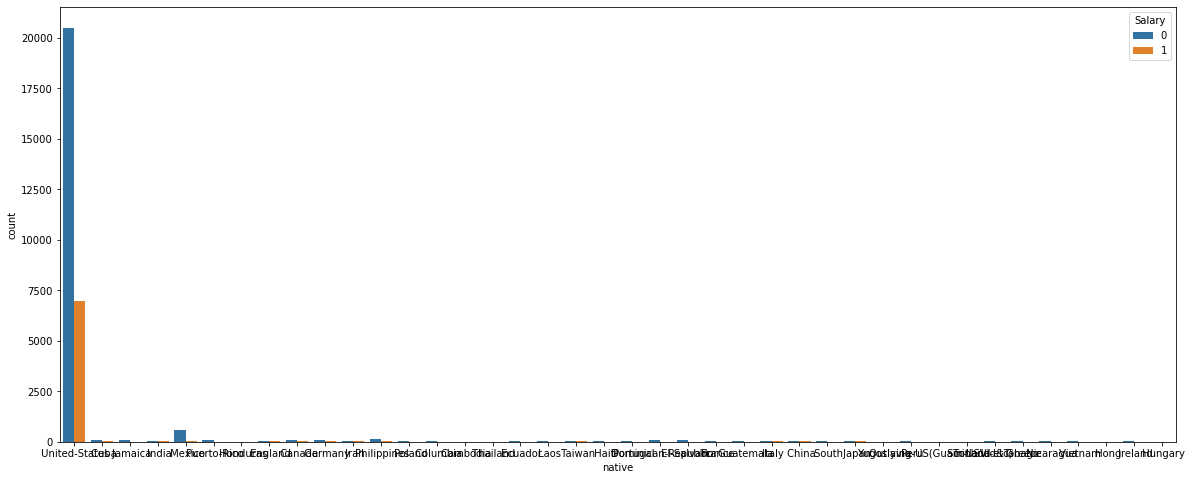

In [31]:
plt.figure(figsize = (20,8))
sns.countplot(x="native", hue="Salary", data=salary)

In [41]:
salary['Salary'].value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

In [32]:
salary['sex'] = le.fit_transform(salary['sex'])

In [33]:
salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,0,38,United-States,0
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,United-States,1
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,0,40,United-States,0
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,1,0,0,20,United-States,0


In [34]:
salary['race'] = le.fit_transform(salary['race'])

In [35]:
salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,4,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,4,1,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,4,1,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,2,1,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,2,0,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,4,0,0,0,38,United-States,0
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,4,1,0,0,40,United-States,1
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,4,0,0,0,40,United-States,0
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,4,1,0,0,20,United-States,0


In [36]:
salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,4,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,4,1,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,4,1,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,2,1,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,2,0,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,4,0,0,0,38,United-States,0
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,4,1,0,0,40,United-States,1
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,4,0,0,0,40,United-States,0
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,4,1,0,0,20,United-States,0


In [37]:
cat_cols = pd.DataFrame(salary[['workclass','education','maritalstatus','occupation','relationship','native']])

In [38]:
cat_cols

,workclass,education,maritalstatus,occupation,relationship,native
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Cuba
...,...,...,...,...,...,...
30156,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,United-States
30157,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,United-States
30158,Private,HS-grad,Widowed,Adm-clerical,Unmarried,United-States
30159,Private,HS-grad,Never-married,Adm-clerical,Own-child,United-States


In [39]:
salary = salary.drop(salary[['workclass','education','maritalstatus','occupation','relationship','native']],axis = 1)

In [107]:
salary

,age,educationno,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,13,4,1,2174,0,40,0
1,50,13,4,1,0,0,13,0
2,38,9,4,1,0,0,40,0
3,53,7,2,1,0,0,40,0
4,28,13,2,0,0,0,40,0
...,...,...,...,...,...,...,...,...
30156,27,12,4,0,0,0,38,0
30157,40,9,4,1,0,0,40,1
30158,58,9,4,0,0,0,40,0
30159,22,9,4,1,0,0,20,0


In [42]:
cat_cols = pd.get_dummies(cat_cols)

In [43]:
cat_cols 

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30157,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30158,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30159,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [44]:
salary

,age,educationno,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,13,4,1,2174,0,40,0
1,50,13,4,1,0,0,13,0
2,38,9,4,1,0,0,40,0
3,53,7,2,1,0,0,40,0
4,28,13,2,0,0,0,40,0
...,...,...,...,...,...,...,...,...
30156,27,12,4,0,0,0,38,0
30157,40,9,4,1,0,0,40,1
30158,58,9,4,0,0,0,40,0
30159,22,9,4,1,0,0,20,0


In [45]:
x = salary.iloc[:,:-1]

In [46]:
x

,age,educationno,race,sex,capitalgain,capitalloss,hoursperweek
0,39,13,4,1,2174,0,40
1,50,13,4,1,0,0,13
2,38,9,4,1,0,0,40
3,53,7,2,1,0,0,40
4,28,13,2,0,0,0,40
...,...,...,...,...,...,...,...
30156,27,12,4,0,0,0,38
30157,40,9,4,1,0,0,40
30158,58,9,4,0,0,0,40
30159,22,9,4,1,0,0,20


In [47]:
y_train = salary.iloc[:,-1]

In [48]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

In [49]:
cat_cols.columns

Index(['workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'maritalstatus_ Divorced',
       'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse',
       'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married',
       'maritalstatus_ Separated', 'maritalstatus_ Widowed',
       'occupation_ Adm-clerical', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Fa

In [50]:
data = pd.concat([x,cat_cols] , axis = 1)

In [51]:
data

,age,educationno,race,sex,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,4,1,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,4,1,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,4,1,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,7,2,1,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,13,2,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,4,0,0,0,38,0,0,1,...,0,0,0,0,0,0,0,1,0,0
30157,40,9,4,1,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
30158,58,9,4,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
30159,22,9,4,1,0,0,20,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
SC = StandardScaler()

In [54]:
data = SC.fit_transform(data)

In [55]:
data

array([[ 0.04277892,  1.12889813,  0.38505523, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [ 0.88026081,  1.12889813,  0.38505523, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [-0.0333558 , -0.4397325 ,  0.38505523, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       ...,
       [ 1.48933854, -0.4397325 ,  0.38505523, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [-1.25151126, -0.4397325 ,  0.38505523, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [ 1.03253024, -0.4397325 ,  0.38505523, ...,  0.31081205,
        -0.04611353, -0.0230384 ]])

In [56]:
from sklearn.decomposition import PCA

In [57]:
pca = PCA(n_components = 7)

In [58]:
PCs = pca.fit_transform(data)

In [59]:
PCs

array([[-0.70800807, -2.94951099, -0.13680719, ...,  1.47377017,
        -0.45960705, -0.47192537],
       [ 2.86214233, -0.97994232, -0.14995718, ...,  1.05065698,
         0.05133155,  1.02122875],
       [-1.35517916,  0.45837822, -0.21892811, ..., -0.59273021,
        -2.05189762, -1.37599242],
       ...,
       [-1.65628642, -0.26080844,  2.29506307, ..., -1.14050071,
         1.20925033,  0.65837867],
       [-2.70228572,  0.38025033, -2.0515305 , ...,  0.38715616,
         1.05045031, -0.58380504],
       [ 1.78120713, -0.68612829,  0.96995472, ..., -0.11898679,
         1.39728131,  1.89032278]])

In [60]:
pc = pca.n_components
pc

7

In [61]:
pca.explained_variance_ratio_

array([0.04237509, 0.0305649 , 0.02364595, 0.02220686, 0.01788026,
       0.01698915, 0.01510039])

In [62]:
pca.explained_variance_

array([4.11052044, 2.96489328, 2.29373309, 2.15413645, 1.73444314,
       1.64800265, 1.46478618])

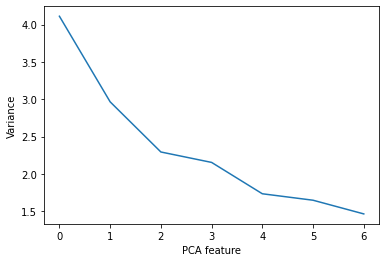

In [63]:
plt.plot(range(pc), pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.show()

In [64]:
#3 principal components seem to contain atleast 80% of data 

In [65]:
pca = PCA(n_components = 3)

In [66]:
newdata = pca.fit_transform(data)

In [67]:
newdata

array([[-0.70797795, -2.95168974, -0.1495882 ],
       [ 2.86245114, -0.97991065, -0.13693089],
       [-1.35543604,  0.45697096, -0.21690315],
       ...,
       [-1.65641065, -0.26379741,  2.27918531],
       [-2.70228633,  0.3787596 , -2.04883767],
       [ 1.7815684 , -0.68799321,  1.00283438]])

In [68]:
X_train = pd.DataFrame(newdata , columns = ['PC1','PC2','PC3'])

In [69]:
X_train

,PC1,PC2,PC3
0,-0.707978,-2.951690,-0.149588
1,2.862451,-0.979911,-0.136931
2,-1.355436,0.456971,-0.216903
3,0.718256,2.414744,-0.643121
4,0.409157,-1.097735,3.528703
...,...,...,...
30156,0.012672,-1.055643,-0.161676
30157,1.291462,2.036524,-0.736310
30158,-1.656411,-0.263797,2.279185
30159,-2.702286,0.378760,-2.048838


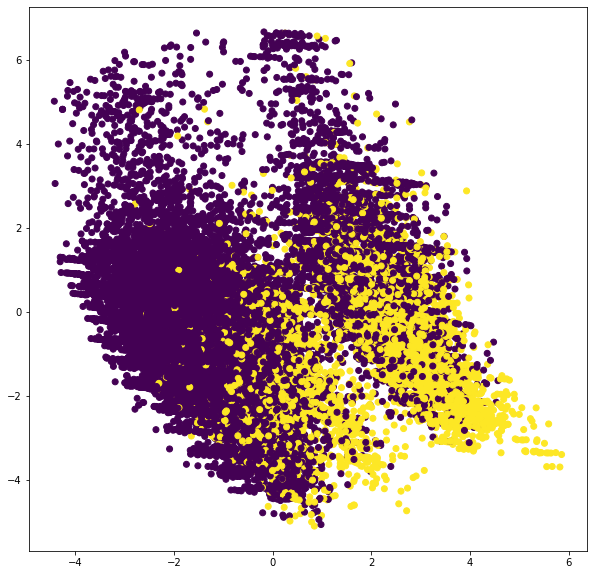

In [70]:
plt.figure(figsize=(10,10))
plt.scatter(newdata[:,0], newdata[:,1], c=y_train)

In [71]:
test = pd.read_csv('C:\\Users\\admin\\Desktop\\DATA SCIENCE\\assignments\\Naive bayes\\SalaryData_Test.csv')

In [72]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [73]:
test['Salary'] = le.fit_transform(test['Salary'])

In [74]:
test['Salary'].value_counts()

0    11360
1     3700
Name: Salary, dtype: int64

In [75]:
test['sex'] = le.fit_transform(test['sex'])

In [76]:
test['race'] = le.fit_transform(test['race'])

In [77]:
test_cat_cols = pd.DataFrame(test[['workclass','education','maritalstatus','occupation','relationship','native']])

In [78]:
test_cat_cols

,workclass,education,maritalstatus,occupation,relationship,native
0,Private,11th,Never-married,Machine-op-inspct,Own-child,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,United-States
4,Private,10th,Never-married,Other-service,Not-in-family,United-States
...,...,...,...,...,...,...
15055,Private,Bachelors,Never-married,Prof-specialty,Own-child,United-States
15056,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,United-States
15057,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,United-States
15058,Private,Bachelors,Divorced,Adm-clerical,Own-child,United-States


In [79]:
test_cat_cols = pd.get_dummies(test_cat_cols)

In [80]:
test_cat_cols

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15056,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15057,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15058,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [81]:
test_int = test.drop(test[['workclass','education','maritalstatus','occupation','relationship','native']],axis = 1)

In [82]:
test_int

,age,educationno,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,7,2,1,0,0,40,0
1,38,9,4,1,0,0,50,0
2,28,12,4,1,0,0,40,1
3,44,10,2,1,7688,0,40,1
4,34,6,4,1,0,0,30,0
...,...,...,...,...,...,...,...,...
15055,33,13,4,1,0,0,40,0
15056,39,13,4,0,0,0,36,0
15057,38,13,4,1,0,0,50,0
15058,44,13,1,1,5455,0,40,0


In [83]:
y_test = test_int.iloc[:,-1]

In [84]:
y_test

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 15060, dtype: int32

In [85]:
xtest = pd.concat([test_int.iloc[:,:-1],test_cat_cols] , axis = 1)

In [86]:
xtest

,age,educationno,race,sex,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,2,1,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,9,4,1,0,0,50,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,12,4,1,0,0,40,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,2,1,7688,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,34,6,4,1,0,0,30,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,4,1,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
15056,39,13,4,0,0,0,36,0,0,1,...,0,0,0,0,0,0,0,1,0,0
15057,38,13,4,1,0,0,50,0,0,1,...,0,0,0,0,0,0,0,1,0,0
15058,44,13,1,1,5455,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [87]:
testdata = SC.fit_transform(xtest)

In [88]:
testdata

array([[-1.02900513, -1.2165628 , -2.03438913, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [-0.05742253, -0.43489824,  0.38223023, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [-0.80479376,  0.73759862,  0.38223023, ...,  0.30373366,
        -0.03554172, -0.02156441],
       ...,
       [-0.05742253,  1.1284309 ,  0.38223023, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [ 0.39100021,  1.1284309 , -3.24269881, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [-0.2816339 ,  1.1284309 ,  0.38223023, ...,  0.30373366,
        -0.03554172, -0.02156441]])

In [89]:
testdata = pca.fit_transform(testdata)

In [90]:
testdata

array([[-2.63139947,  1.61599803, -1.98401554],
       [ 1.83113076,  1.89429508, -0.73707217],
       [ 2.2679893 , -0.97732782, -0.38117215],
       ...,
       [ 2.34782942, -1.29471978, -0.72482685],
       [-1.28632538, -1.54998394,  0.21777183],
       [ 3.4805319 , -1.55235625, -0.54187348]])

In [91]:
X_test = pd.DataFrame(testdata , columns = ['PC1','PC2','PC3'])

In [92]:
X_test

,PC1,PC2,PC3
0,-2.631399,1.615998,-1.984016
1,1.831131,1.894295,-0.737072
2,2.267989,-0.977328,-0.381172
3,1.258916,1.193427,-0.505824
4,-2.508935,1.195092,-0.534742
...,...,...,...
15055,-1.015537,-2.026154,-1.810259
15056,-0.950772,-2.954007,1.030973
15057,2.347829,-1.294720,-0.724827
15058,-1.286325,-1.549984,0.217772


In [93]:
from sklearn.naive_bayes import GaussianNB

In [94]:
gnb = GaussianNB()

In [95]:
gnb.fit(X_train,y_train)

GaussianNB()

In [96]:
pred = gnb.predict(X_test)

In [97]:
pred

array([0, 0, 1, ..., 1, 0, 1])

In [98]:
from sklearn.metrics import accuracy_score

In [99]:
#score of training set
score = accuracy_score(y_test,pred)
score

0.801859229747676

In [100]:
#score of testing
accuracy = accuracy_score(y_test , pred)

In [101]:
accuracy

0.801859229747676

In [102]:
from sklearn.naive_bayes import BernoulliNB

In [103]:
bnb = BernoulliNB()

In [104]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [105]:
pred2 = bnb.predict(X_test)

In [106]:
accuracy_score(y_test,pred2)


0.8166666666666667

# OBSERVATIONS:

 # the private sector provides highest salary of greater than or equal to 50k

# high schol graduates get more salary compared to those people who stopped their edcation before this 

# people who never marry also get more salary compared to  those who are married but the marginal difference  is not that big

# clerical and craft repair professions get more salary compared to toher professions again not by that big of a margin

# It is also very obvious and clear that men get more salary compared to women by a big margin

# it is clear that White people gets paid more compared to every other races especially in America
